# 1- Importing the Dependencies

In [1]:

import pandas as pd 
import numpy as np  
import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder , OrdinalEncoder
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression ,Lasso, Ridge
from sklearn.preprocessing import StandardScaler 

from sklearn.metrics import mean_squared_error , mean_absolute_error , r2_score




# Reading dataset


In [2]:
train_df = r"D:\DEPI\TASKS\lowa reg task\train.csv"
train_df = pd.read_csv(train_df)
train_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [3]:
test_df = r"D:\DEPI\TASKS\lowa reg task\test.csv"
test_df = pd.read_csv(test_df)
test_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  
2       0      3    2010        WD         Normal  
3       0      6    2010        WD         Normal  
4       0      1    2010        WD         Normal  

[5 rows x 80 columns]

In [4]:
submission_df = r"D:\DEPI\TASKS\lowa reg task\sample_submission.csv"
submission_df = pd.read_csv(submission_df)
submission_df.head()

Id      SalePrice
0  1461  169277.052498
1  1462  187758.393989
2  1463  183583.683570
3  1464  179317.477511
4  1465  150730.079977

# 1- Data exploration

In [5]:
print("Number of rows of training data:", train_df.shape[0])
print("Number of columns of training data:", train_df.shape[1])
print("Number of rows of testing data:", test_df.shape[0])
print("Number of columns of testing data:", test_df.shape[1])

Number of rows of training data: 1460
Number of columns of training data: 81
Number of rows of testing data: 1459
Number of columns of testing data: 80


In [6]:
print("Data types of each column:\n", train_df.dtypes)

Data types of each column:
 Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object


In [7]:
print(train_df.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
print("dataset features: \n ",train_df.columns)


dataset features: 
  Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'Gar

In [5]:
numerical_cols = train_df.select_dtypes(exclude=['object']).columns.tolist()
numerical_features_num = len(numerical_cols)

the number of numerical features is 38
Numerical columns: ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [6]:
categorical_cols = train_df.select_dtypes(include=['object']).columns.tolist()
categorical_cols_num = len (categorical_cols)
print(f"the number of categorical features is {categorical_cols_num}")
print("Numerical columns:", categorical_cols)

the number of categorical features is 43
Numerical columns: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [12]:
train_df.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})

Total No. of Missing Values
Id                                       0
MSSubClass                               0
MSZoning                                 0
LotFrontage                            259
LotArea                                  0
...                                    ...
MoSold                                   0
YrSold                                   0
SaleType                                 0
SaleCondition                            0
SalePrice                                0

[81 rows x 1 columns]

1.2- Summary Statistics

In [13]:
train_df[numerical_cols].describe().T

count           mean           std      min        25%  \
Id             1460.0     730.500000    421.610009      1.0     365.75   
MSSubClass     1460.0      56.897260     42.300571     20.0      20.00   
LotFrontage    1201.0      70.049958     24.284752     21.0      59.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea     1452.0     103.685262    181.066207      0.0       0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF    1460.0    1057.429452    438.705324      0.0     795.75   
1stFlrSF       1460.0    1162.626712    386.587738    334.0     882.00   
2ndFlrSF       1460.0     346.992466    436.528436      0.0       0.00   
LowQualFinSF   1460.0       5.844521     48.623081      0.0       0.00   
GrLivArea      1460.0    1515.463699    525.480383    334.0    1129.50   
BsmtFullBath   1460.0       0.425342      0.518911      0.0       0.00   
BsmtHalfBath   1460.0       0.057534      0.238753      0.0       0.00   
FullBath       1460.0       1.565068      0.550916      0.0       1.00   
HalfBath       1460.0       0.382877      0.502885      0.0       0.00   
BedroomAbvGr   1460.0       2.866438      0.815778      0.0       2.00   
KitchenAbvGr   1460.0       1.046575      0.220338      0.0       1.00   
TotRmsAbvGrd   1460.0       6.517808      1.625393      2.0       5.00   
Fireplaces     1460.0       0.613014      0.644666      0.0       0.00   
GarageYrBlt    1379.0    1978.506164     24.689725   1900.0    1961.00   
GarageCars     1460.0       1.767123      0.747315      0.0       1.00   
GarageArea     1460.0     472.980137    213.804841      0.0     334.50   
WoodDeckSF     1460.0      94.244521    125.338794      0.0       0.00   
OpenPorchSF    1460.0      46.660274     66.256028      0.0       0.00   
EnclosedPorch  1460.0      21.954110     61.119149      0.0       0.00   
3SsnPorch      1460.0       3.409589     29.317331      0.0       0.00   
ScreenPorch    1460.0      15.060959     55.757415      0.0       0.00   
PoolArea       1460.0       2.758904     40.177307      0.0       0.00   
MiscVal        1460.0      43.489041    496.123024      0.0       0.00   
MoSold         1460.0       6.321918      2.703626      1.0       5.00   
YrSold         1460.0    2007.815753      1.328095   2006.0    2007.00   
SalePrice      1460.0  180921.195890  79442.502883  34900.0  129975.00   

                    50%        75%       max  
Id                730.5    1095.25    1460.0  
MSSubClass         50.0      70.00     190.0  
LotFrontage        69.0      80.00     313.0  
LotArea          9478.5   11601.50  215245.0  
OverallQual         6.0       7.00      10.0  
OverallCond         5.0       6.00       9.0  
YearBuilt        1973.0    2000.00    2010.0  
YearRemodAdd     1994.0    2004.00    2010.0  
MasVnrArea          0.0     166.00    1600.0  
BsmtFinSF1        383.5     712.25    5644.0  
BsmtFinSF2          0.0       0.00    1474.0  
BsmtUnfSF         477.5     808.00    2336.0  
TotalBsmtSF       991.5    1298.25    6110.0  
1stFlrSF         1087.0    1391.25    4692.0  
2ndFlrSF            0.0     728.00    2065.0  
LowQualFinSF        0.0       0.00     572.0  
GrLivArea        1464.0    1776.75    5642.0  
BsmtFullBath        0.0       1.00       3.0  
BsmtHalfBath        0.0       0.00       2.0  
FullBath            2.0       2.00       3.0  
HalfBath            0.0       1.00       2.0  
BedroomAbvGr        3.0       3.00       8.0  
KitchenAbvGr        1.0       1.00       3.0  
T

In [14]:
train_df.describe(include='object')

MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count      1460   1460    91     1460        1460      1460      1460   
unique        5      2     2        4           4         2         5   
top          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside   
freq       1151   1454    50      925        1311      1459      1052   

       LandSlope Neighborhood Condition1  ... GarageType GarageFinish  \
count       1460         1460       1460  ...       1379         1379   
unique         3           25          9  ...          6            3   
top          Gtl        NAmes       Norm  ...     Attchd          Unf   
freq        1382          225       1260  ...        870          605   

       GarageQual GarageCond PavedDrive PoolQC  Fence MiscFeature SaleType  \
count        1379       1379       1460      7    281          54     1460   
unique          5          5          3      3      4           4        9   
top            TA         TA          Y     Gd  MnPrv        Shed       WD   
freq         1311       1326       1340      3    157          49     1267   

       SaleCondition  
count           1460  
unique             6  
top           Normal  
freq            1198  

[4 rows x 43 columns]

1.3- Explore Categorical Variables

In [15]:
unique_counts = train_df[categorical_cols].nunique()
print("Unique value counts for categorical columns:")
print(unique_counts)

Unique value counts for categorical columns:
MSZoning          5
Street            2
Alley             2
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          8
Exterior1st      15
Exterior2nd      16
MasVnrType        3
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          4
BsmtCond          4
BsmtExposure      4
BsmtFinType1      6
BsmtFinType2      6
Heating           6
HeatingQC         5
CentralAir        2
Electrical        5
KitchenQual       4
Functional        7
FireplaceQu       5
GarageType        6
GarageFinish      3
GarageQual        5
GarageCond        5
PavedDrive        3
PoolQC            3
Fence             4
MiscFeature       4
SaleType          9
SaleCondition     6
dtype: int64


1.4 - Identify columns with missing values

In [16]:
# Identify Columns with Missing Values in testing Data
missing_data = test_df.isnull().sum()
missing_data = missing_data[missing_data > 0] 
missing_percentage = (missing_data / len(test_df)) * 100

missing_info = pd.DataFrame({
    'Missing Values': missing_data,
    'Percentage': missing_percentage
})

print(missing_info.sort_values(by='Percentage', ascending=False))

              Missing Values  Percentage
PoolQC                  1456   99.794380
MiscFeature             1408   96.504455
Alley                   1352   92.666210
Fence                   1169   80.123372
MasVnrType               894   61.274846
FireplaceQu              730   50.034270
LotFrontage              227   15.558602
GarageQual                78    5.346127
GarageCond                78    5.346127
GarageYrBlt               78    5.346127
GarageFinish              78    5.346127
GarageType                76    5.209047
BsmtCond                  45    3.084304
BsmtQual                  44    3.015764
BsmtExposure              44    3.015764
BsmtFinType1              42    2.878684
BsmtFinType2              42    2.878684
MasVnrArea                15    1.028101
MSZoning                   4    0.274160
Functional                 2    0.137080
BsmtFullBath               2    0.137080
Utilities                  2    0.137080
BsmtHalfBath               2    0.137080
Exterior1st     

In [17]:
# Identify Columns with Missing Values in Training Data
missing_data = train_df.isnull().sum()
missing_data = missing_data[missing_data > 0] 
missing_percentage = (missing_data / len(train_df)) * 100

missing_info = pd.DataFrame({
    'Missing Values': missing_data,
    'Percentage': missing_percentage
})

print(missing_info.sort_values(by='Percentage', ascending=False))

              Missing Values  Percentage
PoolQC                  1453   99.520548
MiscFeature             1406   96.301370
Alley                   1369   93.767123
Fence                   1179   80.753425
MasVnrType               872   59.726027
FireplaceQu              690   47.260274
LotFrontage              259   17.739726
GarageType                81    5.547945
GarageYrBlt               81    5.547945
GarageFinish              81    5.547945
GarageQual                81    5.547945
GarageCond                81    5.547945
BsmtExposure              38    2.602740
BsmtFinType2              38    2.602740
BsmtQual                  37    2.534247
BsmtCond                  37    2.534247
BsmtFinType1              37    2.534247
MasVnrArea                 8    0.547945
Electrical                 1    0.068493


1.5 - Detecing Outliers

In [18]:
outlier_info = {}

for col in numerical_cols:
    Q1 = train_df[col].quantile(0.25)
    Q3 = train_df[col].quantile(0.75)
    IQR = Q3 - Q1

   
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = train_df[(train_df[col] < lower_bound) | (train_df[col] > upper_bound)]
    outlier_info[col] = len(outliers)

print("Number of outliers for each numerical column :")
for col, count in outlier_info.items():
    print(f"{col}: {count} outliers")

Number of outliers for each numerical column :
Id: 0 outliers
MSSubClass: 103 outliers
LotFrontage: 88 outliers
LotArea: 69 outliers
OverallQual: 2 outliers
OverallCond: 125 outliers
YearBuilt: 7 outliers
YearRemodAdd: 0 outliers
MasVnrArea: 96 outliers
BsmtFinSF1: 7 outliers
BsmtFinSF2: 167 outliers
BsmtUnfSF: 29 outliers
TotalBsmtSF: 61 outliers
1stFlrSF: 20 outliers
2ndFlrSF: 2 outliers
LowQualFinSF: 26 outliers
GrLivArea: 31 outliers
BsmtFullBath: 1 outliers
BsmtHalfBath: 82 outliers
FullBath: 0 outliers
HalfBath: 0 outliers
BedroomAbvGr: 35 outliers
KitchenAbvGr: 68 outliers
TotRmsAbvGrd: 30 outliers
Fireplaces: 5 outliers
GarageYrBlt: 0 outliers
GarageCars: 5 outliers
GarageArea: 21 outliers
WoodDeckSF: 32 outliers
OpenPorchSF: 77 outliers
EnclosedPorch: 208 outliers
3SsnPorch: 24 outliers
ScreenPorch: 116 outliers
PoolArea: 7 outliers
MiscVal: 52 outliers
MoSold: 0 outliers
YrSold: 0 outliers
SalePrice: 61 outliers


# 2- Data Visualization
Histograms: Show the distribution of individual numerical features.

Box Plots: Highlight the distribution, median, quartiles, and outliers.


Bar Plots for Categorical Data: Visualize the frequency distribution of categorical variables.

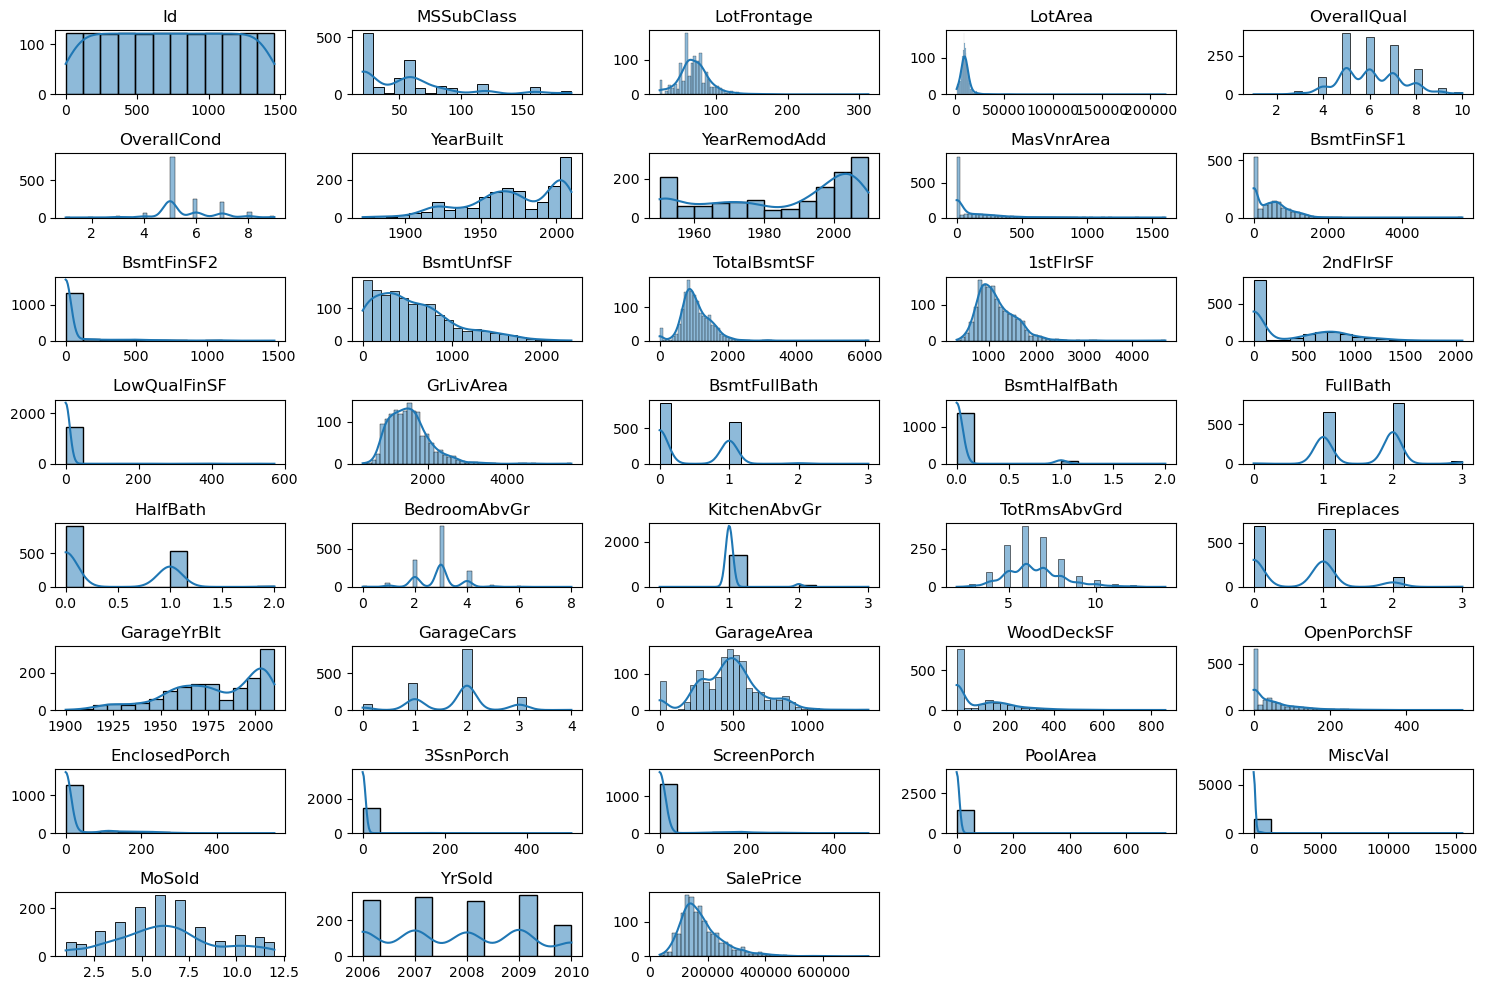

In [19]:
# Plot histograms
plt.figure(figsize=(15, 10))
num_plots = len(numerical_cols)

# Adjust the grid dimensions based on the number of plots
num_rows = (num_plots // 5) + 1  # Calculate number of rows needed
num_cols = min(num_plots, 5)     # Limit to 5 columns if more than that
for i, col in enumerate(numerical_cols):
    plt.subplot(num_rows, num_cols, i + 1)  # Adjust subplot dimensions
    sns.histplot(train_df[col].dropna(), kde=True)
    plt.title(col)
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()

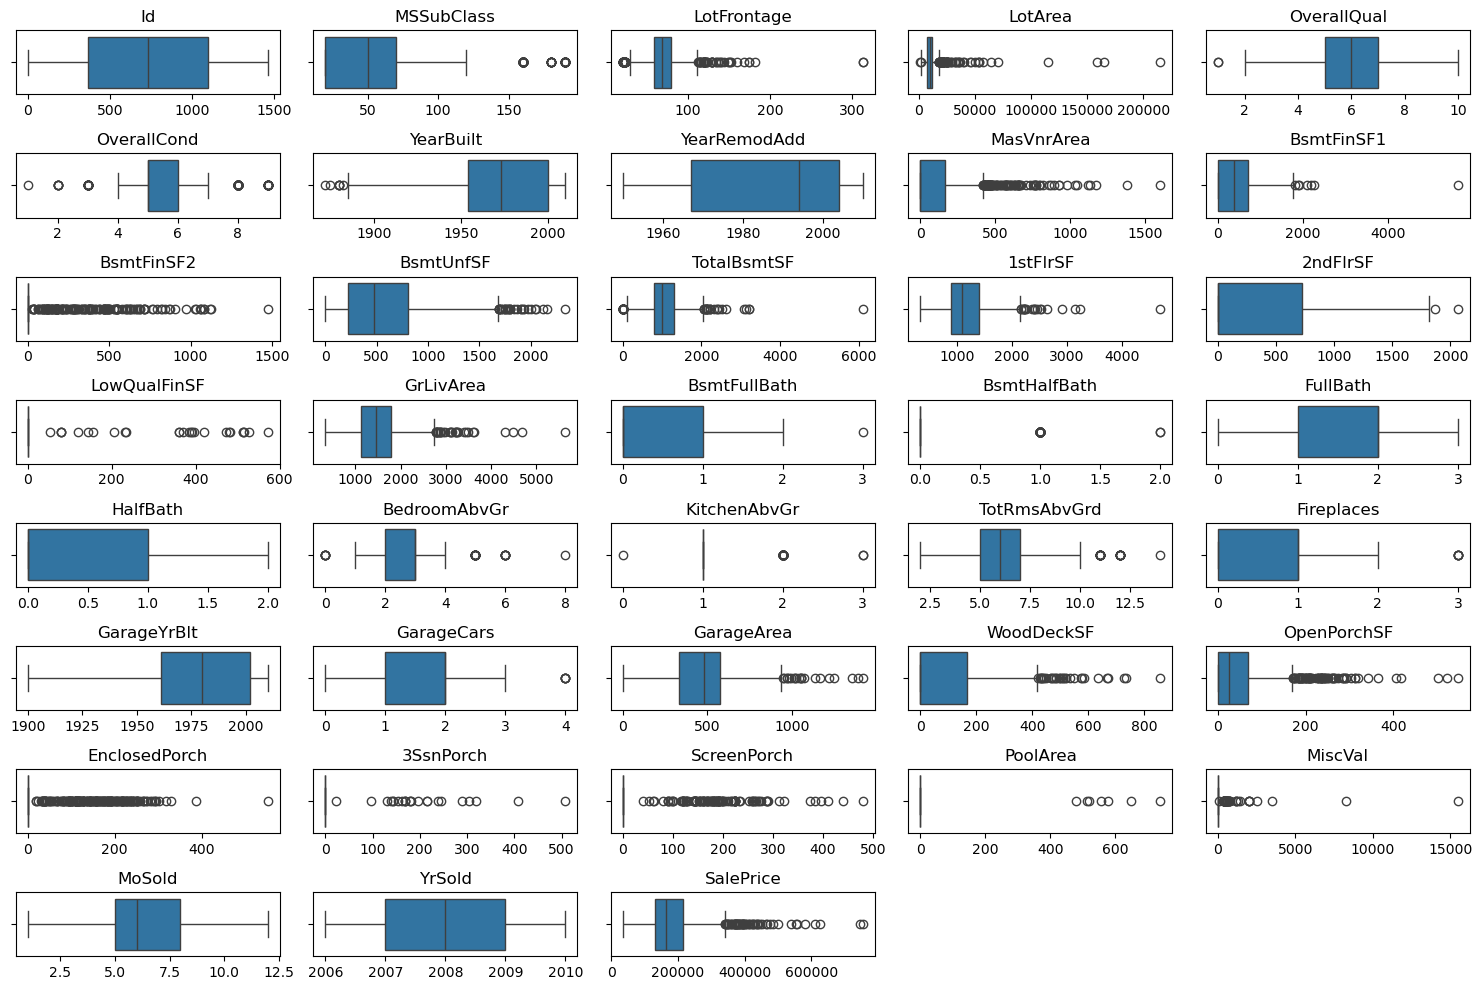

In [21]:
# Plot box plots
plt.figure(figsize=(15, 10))
num_plots = len(numerical_cols)

# Adjust the grid dimensions based on the number of plots
num_rows = (num_plots // 5) + 1  # Calculate number of rows needed
num_cols = min(num_plots, 5)     # Limit to 5 columns if more than that

for i, col in enumerate(numerical_cols):
    plt.subplot(num_rows, num_cols, i + 1)  # Adjust subplot dimensions
    sns.boxplot(x=train_df[col])
    plt.title(col)
    plt.xlabel('')

plt.tight_layout()
plt.show()

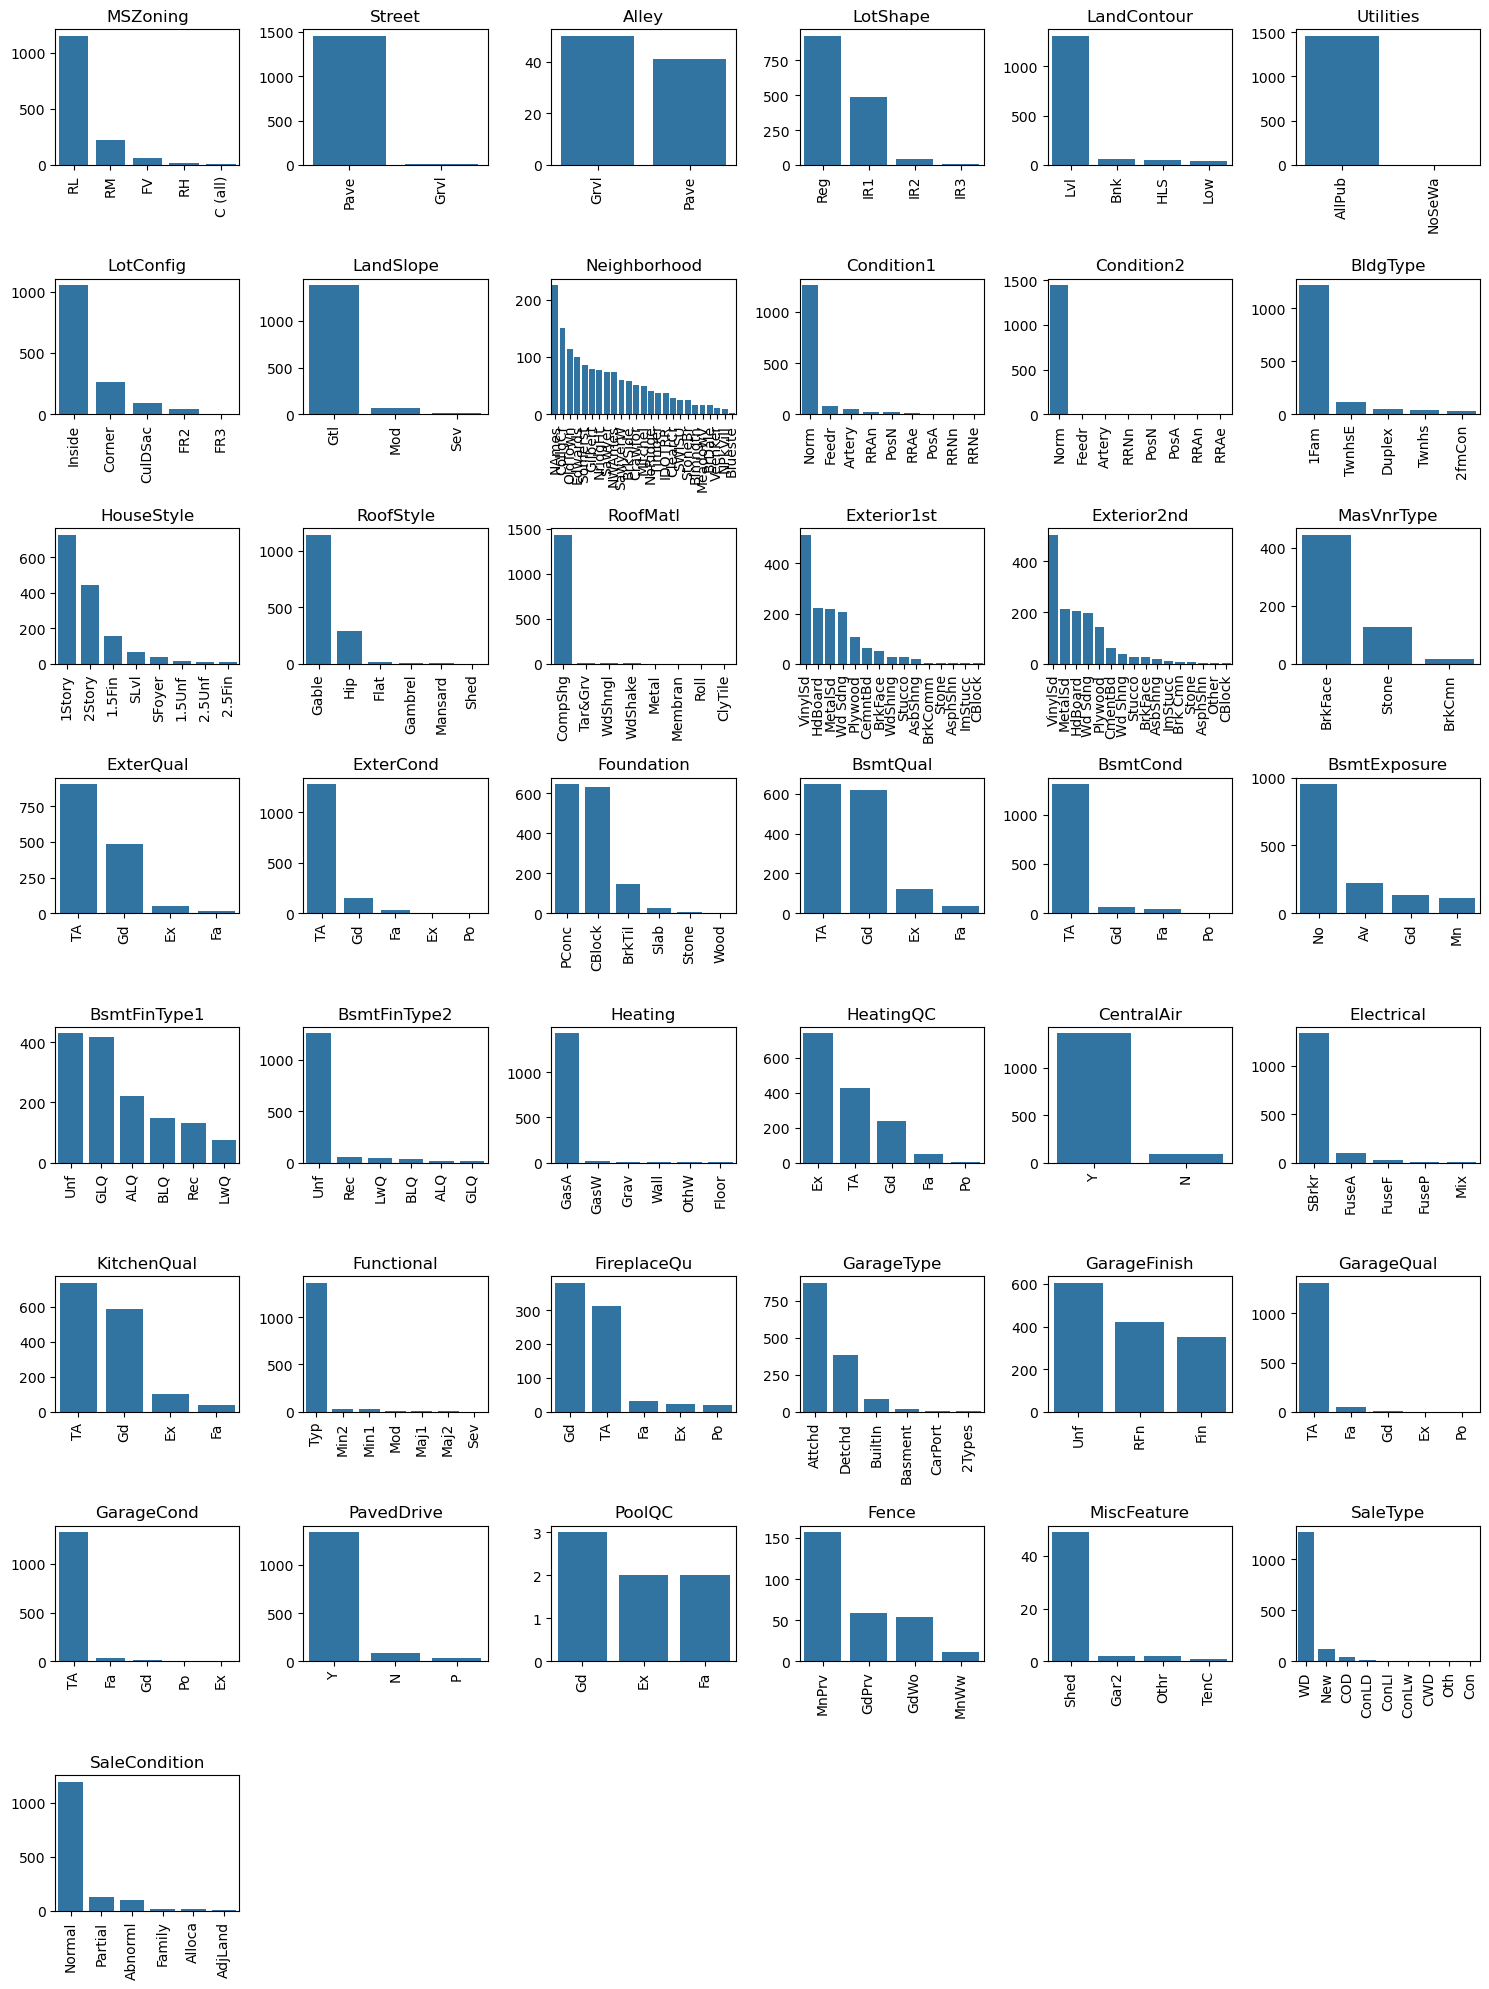

In [22]:
# Plot bar plots for categorical columns
plt.figure(figsize=(15, 20))
for i, col in enumerate(categorical_cols):
    plt.subplot(8, 6, i + 1)
    sns.countplot(x=train_df[col], order=train_df[col].value_counts().index)
    plt.title(col)
    plt.xlabel('')
    plt.ylabel('')
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# 3- Data preprocessing


3.1- handling missing values

In [7]:
# Columns to drop
columns_to_drop = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'FireplaceQu']

train_df.drop(columns=columns_to_drop, inplace=True)
test_df.drop(columns=columns_to_drop, inplace=True)

In [8]:
X_train = train_df.drop(['SalePrice'], axis=1)
y_train = train_df['SalePrice']
X_test = test_df.copy()

In [9]:
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_train.select_dtypes(include=['object']).columns

In [10]:
# Impute missing values for numerical columns with median
num_imputer = SimpleImputer(strategy='mean')
X_train[numerical_cols] = num_imputer.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = num_imputer.transform(X_test[numerical_cols])

In [11]:
# Impute missing values for categorical columns with most frequent
cat_imputer = SimpleImputer(strategy='most_frequent')
X_train[categorical_cols] = cat_imputer.fit_transform(X_train[categorical_cols])
X_test[categorical_cols] = cat_imputer.transform(X_test[categorical_cols])

In [12]:
print("\nMissing Values After Imputation in Training Data:")
print(X_train.isnull().sum().sum())

print("\nMissing Values After Imputation in Test Data:")
print(X_test.isnull().sum().sum())


Missing Values After Imputation in Training Data:
0

Missing Values After Imputation in Test Data:
0


 3.2- Normalization (Min-Max Scaling)

In [13]:
scaler = MinMaxScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])


In [14]:
print("Scaled  Numerical Features in train data :")
print(X_train[numerical_cols].head())

Scaled  Numerical Features in train data :
         Id  MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
0  0.000000    0.235294     0.150685  0.033420     0.666667        0.500   
1  0.000685    0.000000     0.202055  0.038795     0.555556        0.875   
2  0.001371    0.235294     0.160959  0.046507     0.666667        0.500   
3  0.002056    0.294118     0.133562  0.038561     0.666667        0.500   
4  0.002742    0.235294     0.215753  0.060576     0.777778        0.500   

   YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  GarageArea  \
0   0.949275      0.883333     0.12250    0.125089  ...    0.386460   
1   0.753623      0.433333     0.00000    0.173281  ...    0.324401   
2   0.934783      0.866667     0.10125    0.086109  ...    0.428773   
3   0.311594      0.333333     0.00000    0.038271  ...    0.452750   
4   0.927536      0.833333     0.21875    0.116052  ...    0.589563   

   WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolAr

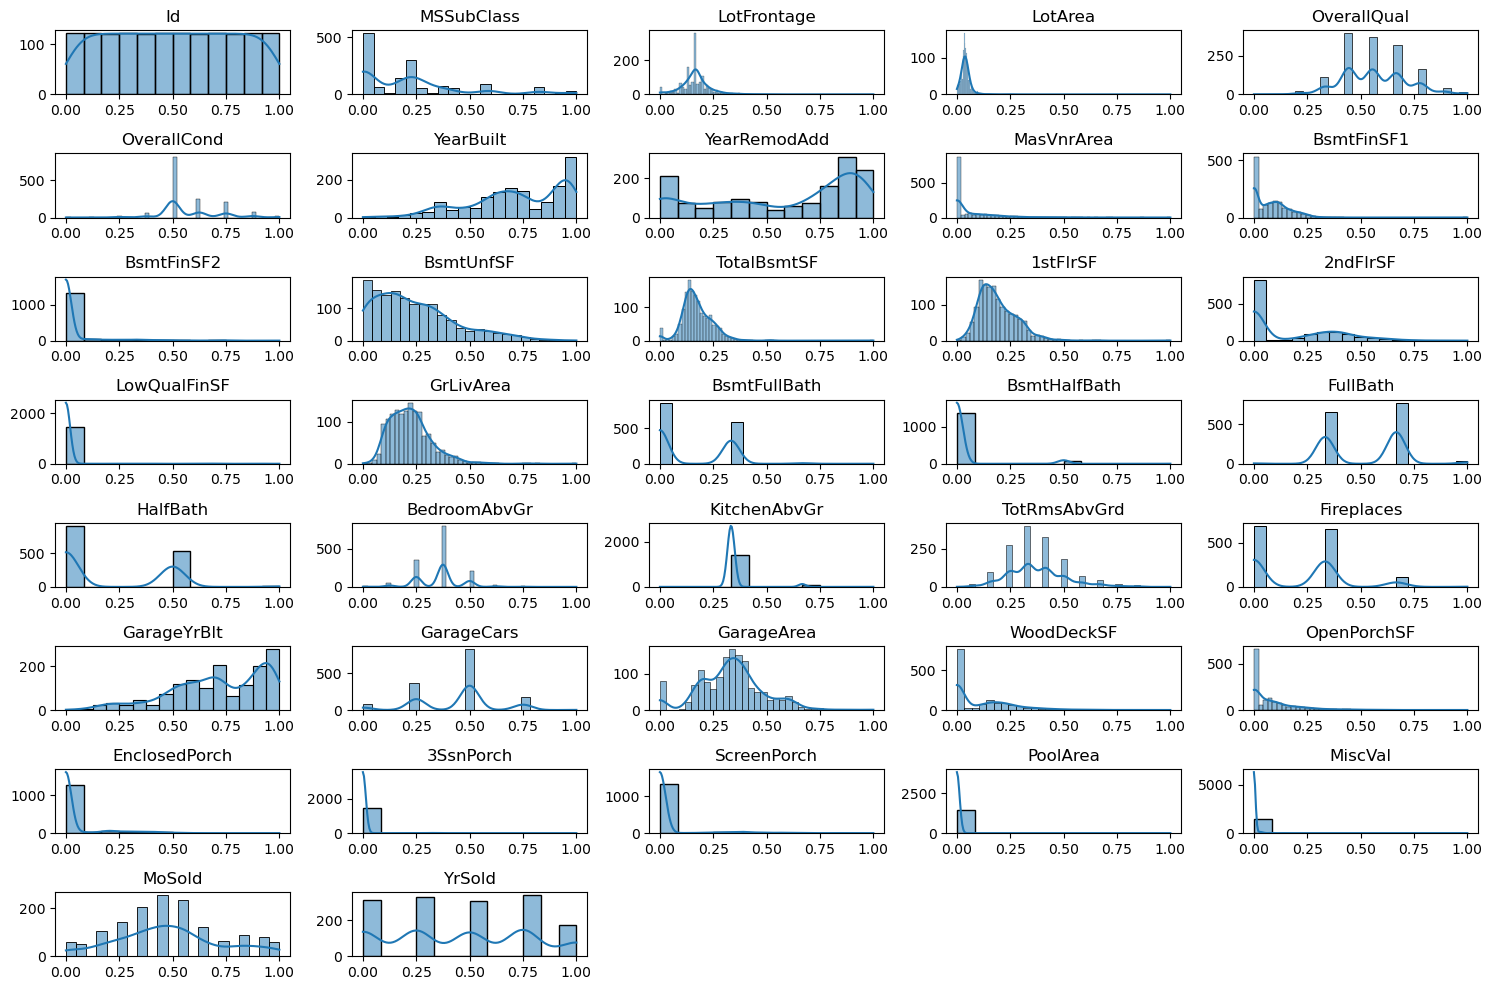

In [28]:
plt.figure(figsize=(15, 10))
num_plots = len(numerical_cols)

num_rows = (num_plots // 5) + 1 
num_cols = min(num_plots, 5)    
for i, col in enumerate(numerical_cols):
    plt.subplot(num_rows, num_cols, i + 1) 
    sns.histplot(X_train[col].dropna(), kde=True)
    plt.title(col)
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()

3.3-removing outliers

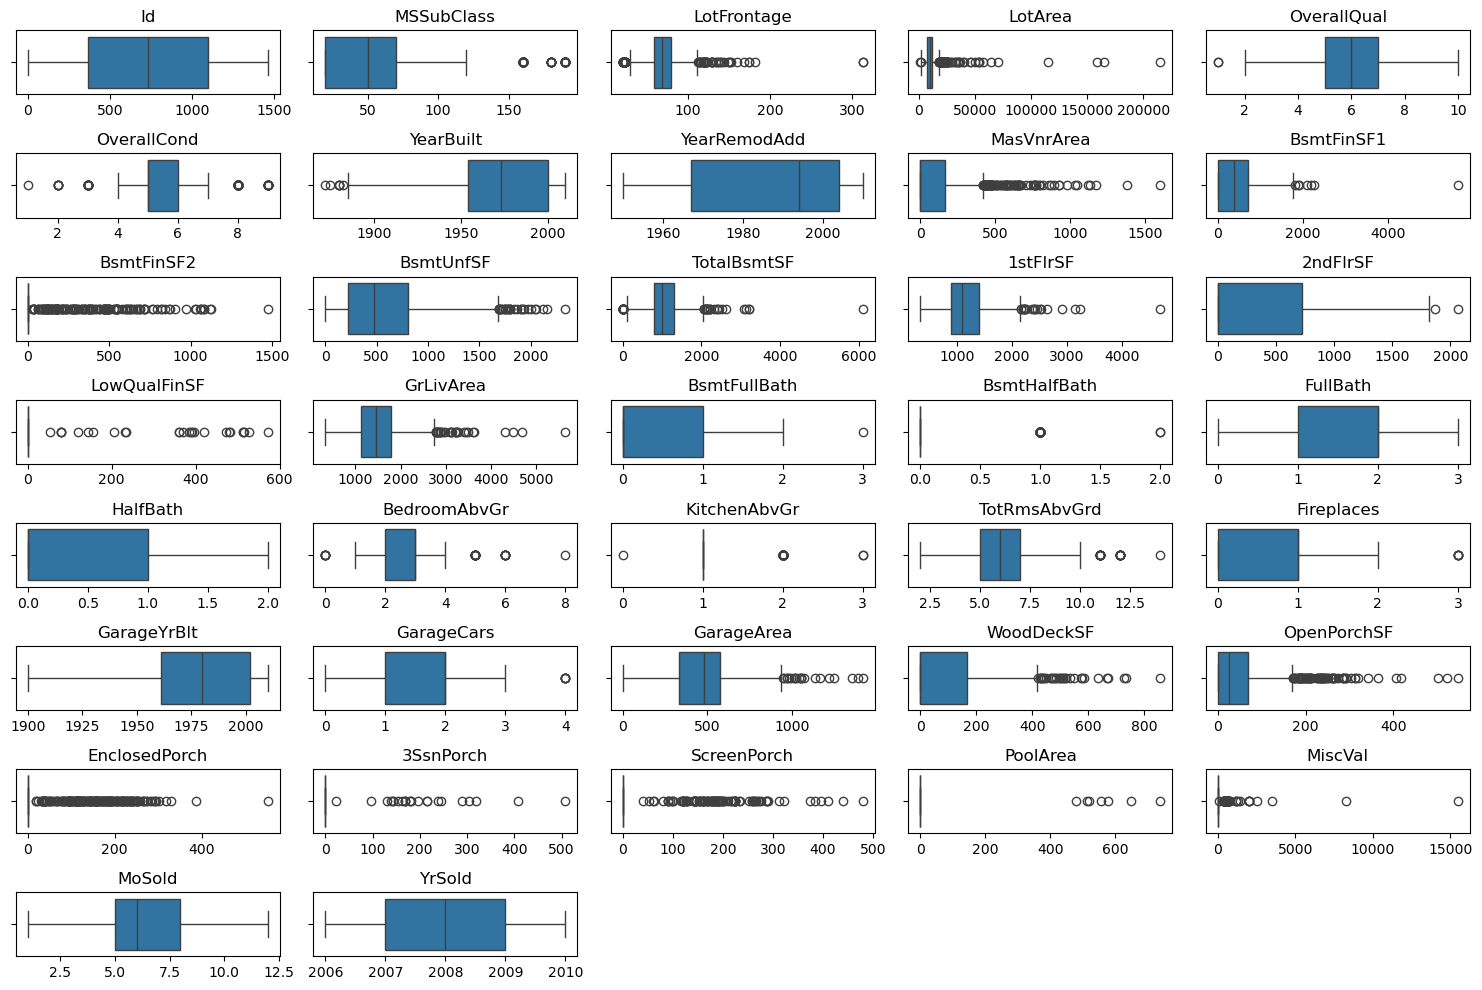

In [32]:
# Data before removing outliers
plt.figure(figsize=(15, 10))
num_plots = len(numerical_cols)


num_rows = (num_plots // 5) + 1  
num_cols = min(num_plots, 5)     

for i, col in enumerate(numerical_cols):
    plt.subplot(num_rows, num_cols, i + 1)  
    sns.boxplot(x=train_df[col])
    plt.title(col)
    plt.xlabel('')

plt.tight_layout()
plt.show()

In [15]:
def remove_outliers(df, numerical_cols):
    for col in numerical_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

In [16]:
X_train = remove_outliers(X_train, numerical_cols)
y_train = y_train.loc[X_train.index]  # Keep target variable aligned with features
X_test = remove_outliers(X_test, numerical_cols)

In [31]:
print("\nTraining Data after removing outliers:")
print(X_train.describe())


Training Data after removing outliers:
               Id  MSSubClass  LotFrontage     LotArea  OverallQual  \
count  554.000000  554.000000   554.000000  554.000000   554.000000   
mean     0.504004    0.170949     0.163303    0.036567     0.585239   
std      0.285658    0.185673     0.046204    0.012162     0.137791   
min      0.000000    0.000000     0.030822    0.007418     0.222222   
25%      0.261309    0.000000     0.136986    0.030061     0.444444   
50%      0.517135    0.176471     0.167979    0.035991     0.555556   
75%      0.749486    0.235294     0.184932    0.044024     0.666667   
max      0.997258    0.588235     0.301370    0.072308     0.888889   

       OverallCond   YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  \
count   554.000000  554.000000    554.000000  554.000000  554.000000  ...   
mean      0.545803    0.808363      0.657972    0.048079    0.077675  ...   
std       0.088087    0.181788      0.325261    0.067002    0.072122  ...   
min       0.

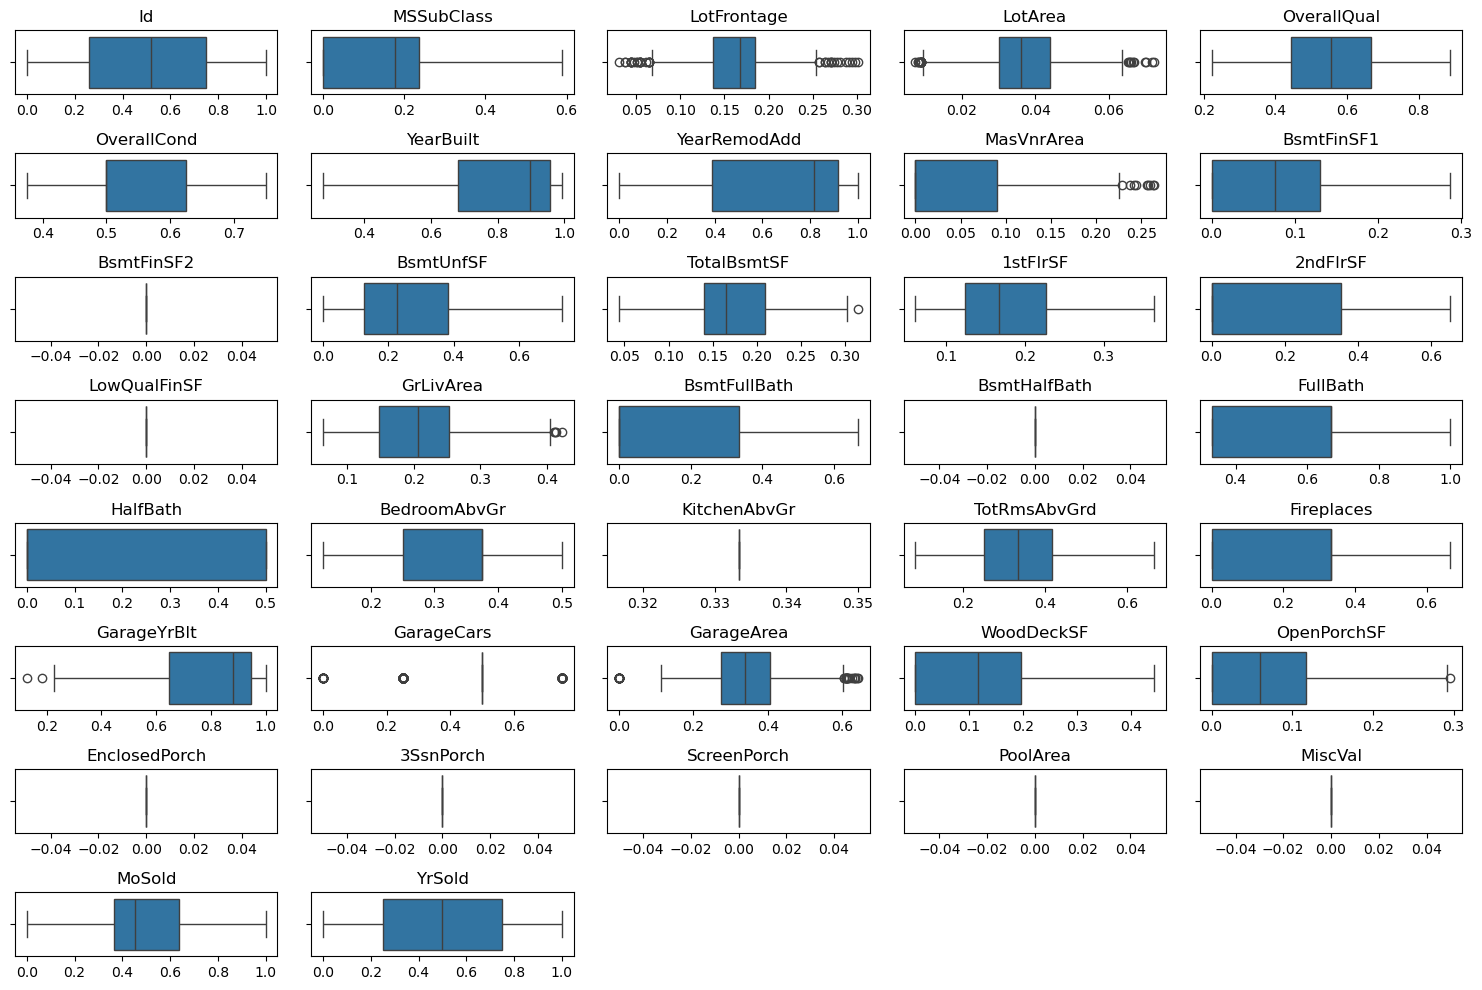

In [36]:
# Data after handling outliers
plt.figure(figsize=(15, 10))
num_plots = len(numerical_cols)

num_rows = (num_plots // 5) + 1  
num_cols = min(num_plots, 5)     

for i, col in enumerate(numerical_cols):
    plt.subplot(num_rows, num_cols, i + 1)  
    sns.boxplot(x=X_train[col])
    plt.title(col)
    plt.xlabel('')

plt.tight_layout()
plt.show()

In [32]:
columns_with_outliers= ['LotFrontage','MasVnrArea','GarageArea','LotArea']
def remove_outliers(df, featuers_with_oultliers):
    for col in featuers_with_oultliers:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

X_train = remove_outliers(X_train, columns_with_outliers)
X_test = remove_outliers(X_test, columns_with_outliers)

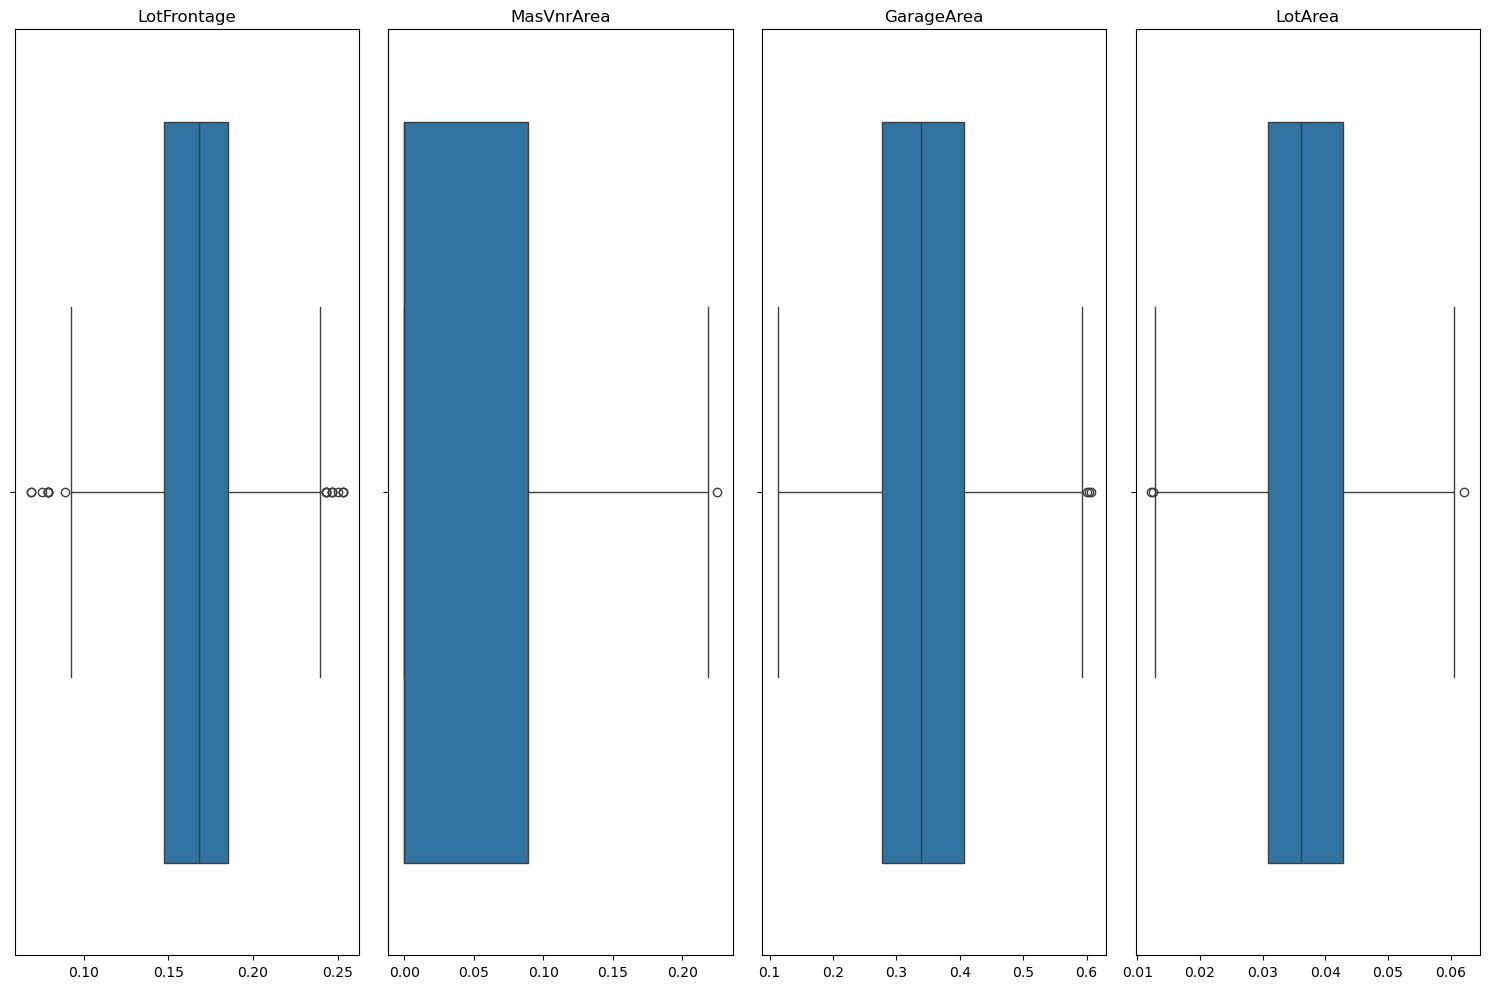

In [38]:
#ploting for the remaining outliers after handling it
plt.figure(figsize=(15, 10))
num_plots = len(columns_with_outliers)


num_rows = (num_plots // 5) + 1  
num_cols = min(num_plots, 5)     

for i, col in enumerate(columns_with_outliers):
    plt.subplot(num_rows, num_cols, i + 1)  
    sns.boxplot(x=X_train[col])
    plt.title(col)
    plt.xlabel('')

plt.tight_layout()
plt.show()

 3.4 Checking Skewness of Continous Features.

In [17]:
X_train[numerical_cols].skew().to_frame().rename(columns={0:"Feature Skewness"})

Feature Skewness
Id                    -0.052184
MSSubClass             0.900054
LotFrontage           -0.156728
LotArea                0.061575
OverallQual           -0.072473
OverallCond            1.337327
YearBuilt             -0.947886
YearRemodAdd          -0.886881
MasVnrArea             1.265495
BsmtFinSF1             0.419780
BsmtFinSF2             0.000000
BsmtUnfSF              0.641409
TotalBsmtSF            0.333876
1stFlrSF               0.495574
2ndFlrSF               0.800159
LowQualFinSF           0.000000
GrLivArea              0.401827
BsmtFullBath           0.359184
BsmtHalfBath           0.000000
FullBath              -0.266063
HalfBath               0.460554
BedroomAbvGr          -0.516731
KitchenAbvGr           0.000000
TotRmsAbvGrd           0.143006
Fireplaces             0.453694
GarageYrBlt           -0.991263
GarageCars            -0.574006
GarageArea            -0.209026
WoodDeckSF             0.653958
OpenPorchSF            0.953093
EnclosedPorch          0.000000
3SsnPorch              0.000000
ScreenPorch            0.000000
PoolArea               0.000000
MiscVal                0.000000
MoSold                 0.239212
YrSold                 0.105710

In [18]:
feature_skewness = {
    'Id': -0.042238, 'MSSubClass': 0.906969, 'LotFrontage': -0.102586, 'LotArea': 0.137245, 'OverallQual': 0.006331,
    'OverallCond': 1.239963, 'YearBuilt': -0.786297, 'YearRemodAdd': -0.796870, 'MasVnrArea': 1.177716,
    'BsmtFinSF1': 0.368434,  'BsmtUnfSF': 0.654045, 'TotalBsmtSF': 0.437333, '1stFlrSF': 0.553265,
    '2ndFlrSF': 0.667406,  'GrLivArea': 0.357083, 'BsmtFullBath': 0.349310,
     'FullBath': -0.359714, 'HalfBath': 0.339973, 'BedroomAbvGr': -0.514335,
     'TotRmsAbvGrd': 0.106033, 'Fireplaces': 0.545940, 'GarageYrBlt': -0.880774,
    'GarageCars': -0.055386, 'GarageArea': 0.220784, 'WoodDeckSF': 0.684429, 'OpenPorchSF': 0.938414,
    'MoSold': 0.228825, 'YrSold': 0.072739
}

In [19]:
def handle_skewness(df, feature_skewness):
    for feature, skew in feature_skewness.items():
        if skew > 0.5:  # Highly skewed to the right
            if any(df[feature] <= 0):
                df[feature] = np.log1p(df[feature] - df[feature].min() + 1)  # log1p(1 + x - min)
            else:
                df[feature] = np.log1p(df[feature])  # log1p(1 + x)
        elif skew < -0.5:  # Highly skewed to the left
            df[feature] = df[feature]**2  # Square transformation
    return df

X_train = handle_skewness(X_train,feature_skewness)
X_test = handle_skewness(X_test,feature_skewness)

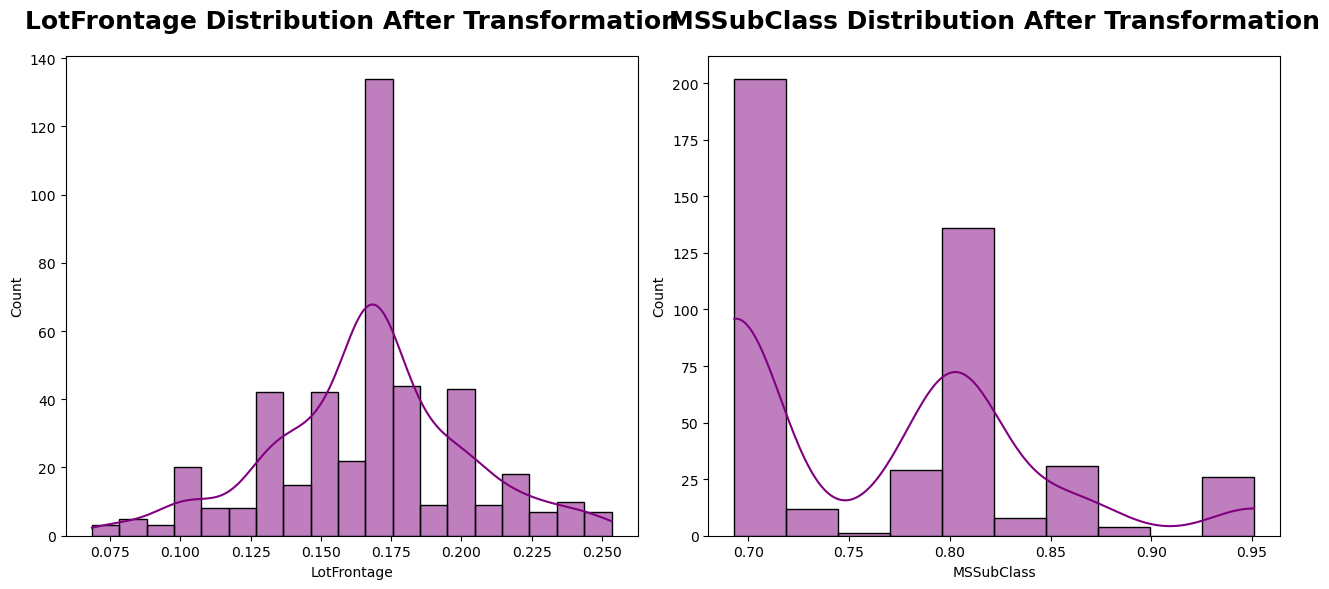

In [42]:
plt.figure(figsize=(13,6))
plt.subplot(1,2,1)
sns.histplot(X_train["LotFrontage"], color="purple", kde=True)
plt.title("LotFrontage Distribution After Transformation",fontweight="black",size=18,pad=20)

plt.subplot(1,2,2)
sns.histplot(X_train["MSSubClass"], color="purple", kde=True)
plt.title("MSSubClass Distribution After Transformation",fontweight="black",size=18,pad=20)
plt.tight_layout()
plt.show()

3.5- label encoding

In [20]:
categorical_cols

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [21]:
unique_counts = X_train[categorical_cols].nunique()
print("Unique value counts for categorical columns:")
print(unique_counts)

Unique value counts for categorical columns:
MSZoning          4
Street            2
LotShape          4
LandContour       4
Utilities         1
LotConfig         5
LandSlope         2
Neighborhood     23
Condition1        8
Condition2        1
BldgType          4
HouseStyle        6
RoofStyle         3
RoofMatl          1
Exterior1st      10
Exterior2nd      12
ExterQual         4
ExterCond         3
Foundation        4
BsmtQual          4
BsmtCond          3
BsmtExposure      4
BsmtFinType1      6
BsmtFinType2      1
Heating           3
HeatingQC         4
CentralAir        2
Electrical        4
KitchenQual       4
Functional        5
GarageType        4
GarageFinish      3
GarageQual        3
GarageCond        4
PavedDrive        3
SaleType          9
SaleCondition     5
dtype: int64


In [22]:
nominal_cols = [
    'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
    'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
    'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
    'Exterior2nd', 'Foundation', 'Heating', 'CentralAir', 'Electrical', 
    'Functional', 'GarageType', 'PavedDrive', 'SaleType', 'SaleCondition'
]

In [23]:
ordinal_cols = {
    'ExterQual': ['Fa', 'TA', 'Gd', 'Ex'],
    'ExterCond': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'BsmtQual': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'BsmtCond': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'BsmtExposure': ['No', 'Mn', 'Av', 'Gd'],
    'BsmtFinType1': ['Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
    'BsmtFinType2': ['Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
    'HeatingQC': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'KitchenQual': ['Fa', 'TA', 'Gd', 'Ex'],
    'FireplaceQu': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'GarageFinish': ['Unf', 'RFn', 'Fin'],
    'GarageQual': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'GarageCond': ['Po', 'Fa', 'TA', 'Gd', 'Ex']
}

In [24]:
# Remove non existent columns from ordinal_cols
for col in list(ordinal_cols.keys()):
    if col not in X_train.columns:
        ordinal_cols.pop(col)

In [25]:
# Fill missing values for ordinal columns with a placeholder
missing_placeholder = -1
for col in ordinal_cols.keys():
    X_train[col] = X_train[col].fillna(missing_placeholder)
    X_test[col] = X_test[col].fillna(missing_placeholder)

In [26]:
X_train_encoded = X_train.copy()
X_test_encoded = X_test.copy()

In [27]:
# Label encoding for nominal columns
label_encoders = {}
for col in nominal_cols:
    encoder = LabelEncoder()
    encoder.fit(pd.concat([X_train_encoded[col], X_test_encoded[col]], axis=0))  # Fit on combined train and test data
    X_train_encoded[col] = encoder.transform(X_train_encoded[col])
    X_test_encoded[col] = encoder.transform(X_test_encoded[col])
    label_encoders[col] = encoder

In [28]:
# Apply ordinal encoding
ordinal_encoders = {}
for col, order in ordinal_cols.items():
    order_with_missing = ['missing'] + order
    oe = OrdinalEncoder(categories=[order_with_missing], handle_unknown='use_encoded_value', unknown_value=-1)
    oe.fit(X_train_encoded[[col]])  # Fit on training data
    X_train_encoded[col] = oe.transform(X_train_encoded[[col]]).astype(int)
    X_test_encoded[col] = oe.transform(X_test_encoded[[col]]).astype(int)
    ordinal_encoders[col] = oe

In [29]:
# Display encoded nominal columns
print("Encoded Nominal Columns in Training Data:")
print(X_train_encoded[nominal_cols].head())

Encoded Nominal Columns in Training Data:
    MSZoning  Street  LotShape  LandContour  Utilities  LotConfig  LandSlope  \
0          3       1         3            3          0          4          0   
2          3       1         0            3          0          4          0   
4          3       1         0            3          0          2          0   
6          3       1         3            3          0          4          0   
10         3       1         3            3          0          4          0   

    Neighborhood  Condition1  Condition2  ...  Exterior2nd  Foundation  \
0              4           2           2  ...            9           2   
2              4           2           2  ...            9           2   
4             14           2           2  ...            9           2   
6             20           2           2  ...            9           2   
10            18           2           2  ...            3           1   

    Heating  CentralAir  Electri

# 4- Feature engineering

In [30]:
X_train_encoded.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'Enclo

4.1- reducing Features

In [31]:
X_train_encoded['Age'] = X_train_encoded['YrSold'] - X_train_encoded['YearBuilt']
X_test_encoded['Age'] = X_test_encoded['YrSold'] - X_test_encoded['YearBuilt']

X_train_encoded['RenovationAge'] = X_train_encoded['YrSold'] - X_train_encoded['YearRemodAdd']
X_test_encoded['RenovationAge'] = X_test_encoded['YrSold'] - X_test_encoded['YearRemodAdd']

X_train_encoded['TotalBsmtArea'] = X_train_encoded['BsmtFinSF1'] + X_train_encoded['BsmtFinSF2'] + X_train_encoded['BsmtUnfSF']
X_test_encoded['TotalBsmtArea'] = X_test_encoded['BsmtFinSF1'] + X_test_encoded['BsmtFinSF2'] + X_test_encoded['BsmtUnfSF']

X_train_encoded['TotalFinishedSF'] = X_train_encoded['1stFlrSF'] + X_train_encoded['2ndFlrSF'] + X_train_encoded['TotalBsmtSF']
X_test_encoded['TotalFinishedSF'] = X_test_encoded['1stFlrSF'] + X_test_encoded['2ndFlrSF'] + X_test_encoded['TotalBsmtSF']

X_train_encoded['TotalPorchArea'] = X_train_encoded['WoodDeckSF'] + X_train_encoded['OpenPorchSF'] + X_train_encoded['EnclosedPorch'] + X_train_encoded['3SsnPorch'] + X_train_encoded['ScreenPorch']
X_test_encoded['TotalPorchArea'] = X_test_encoded['WoodDeckSF'] + X_test_encoded['OpenPorchSF'] + X_test_encoded['EnclosedPorch'] + X_test_encoded['3SsnPorch'] + X_test_encoded['ScreenPorch']

X_train_encoded['TotalBathrooms'] = X_train_encoded['FullBath'] + 0.5 * X_train_encoded['HalfBath'] + X_train_encoded['BsmtFullBath'] + 0.5 * X_train_encoded['BsmtHalfBath']
X_test_encoded['TotalBathrooms'] = X_test_encoded['FullBath'] + 0.5 * X_test_encoded['HalfBath'] + X_test_encoded['BsmtFullBath'] + 0.5 * X_test_encoded['BsmtHalfBath']


4.2- Feature Selection

In [32]:
# Check if 'SalePrice' is in the DataFrame
if 'SalePrice' not in X_train_encoded.columns:
    X_train_encoded['SalePrice'] = y_train

In [33]:
correlation_matrix = X_train_encoded.corr()
correlation_with_target = correlation_matrix['SalePrice'].sort_values(ascending=False)

print("\nCorrelation with SalePrice:")
print(correlation_with_target)



Correlation with SalePrice:
SalePrice          1.000000
TotalFinishedSF    0.844411
OverallQual        0.833461
GrLivArea          0.750305
GarageCars         0.712861
                     ...   
EnclosedPorch           NaN
3SsnPorch               NaN
ScreenPorch             NaN
PoolArea                NaN
MiscVal                 NaN
Name: SalePrice, Length: 81, dtype: float64


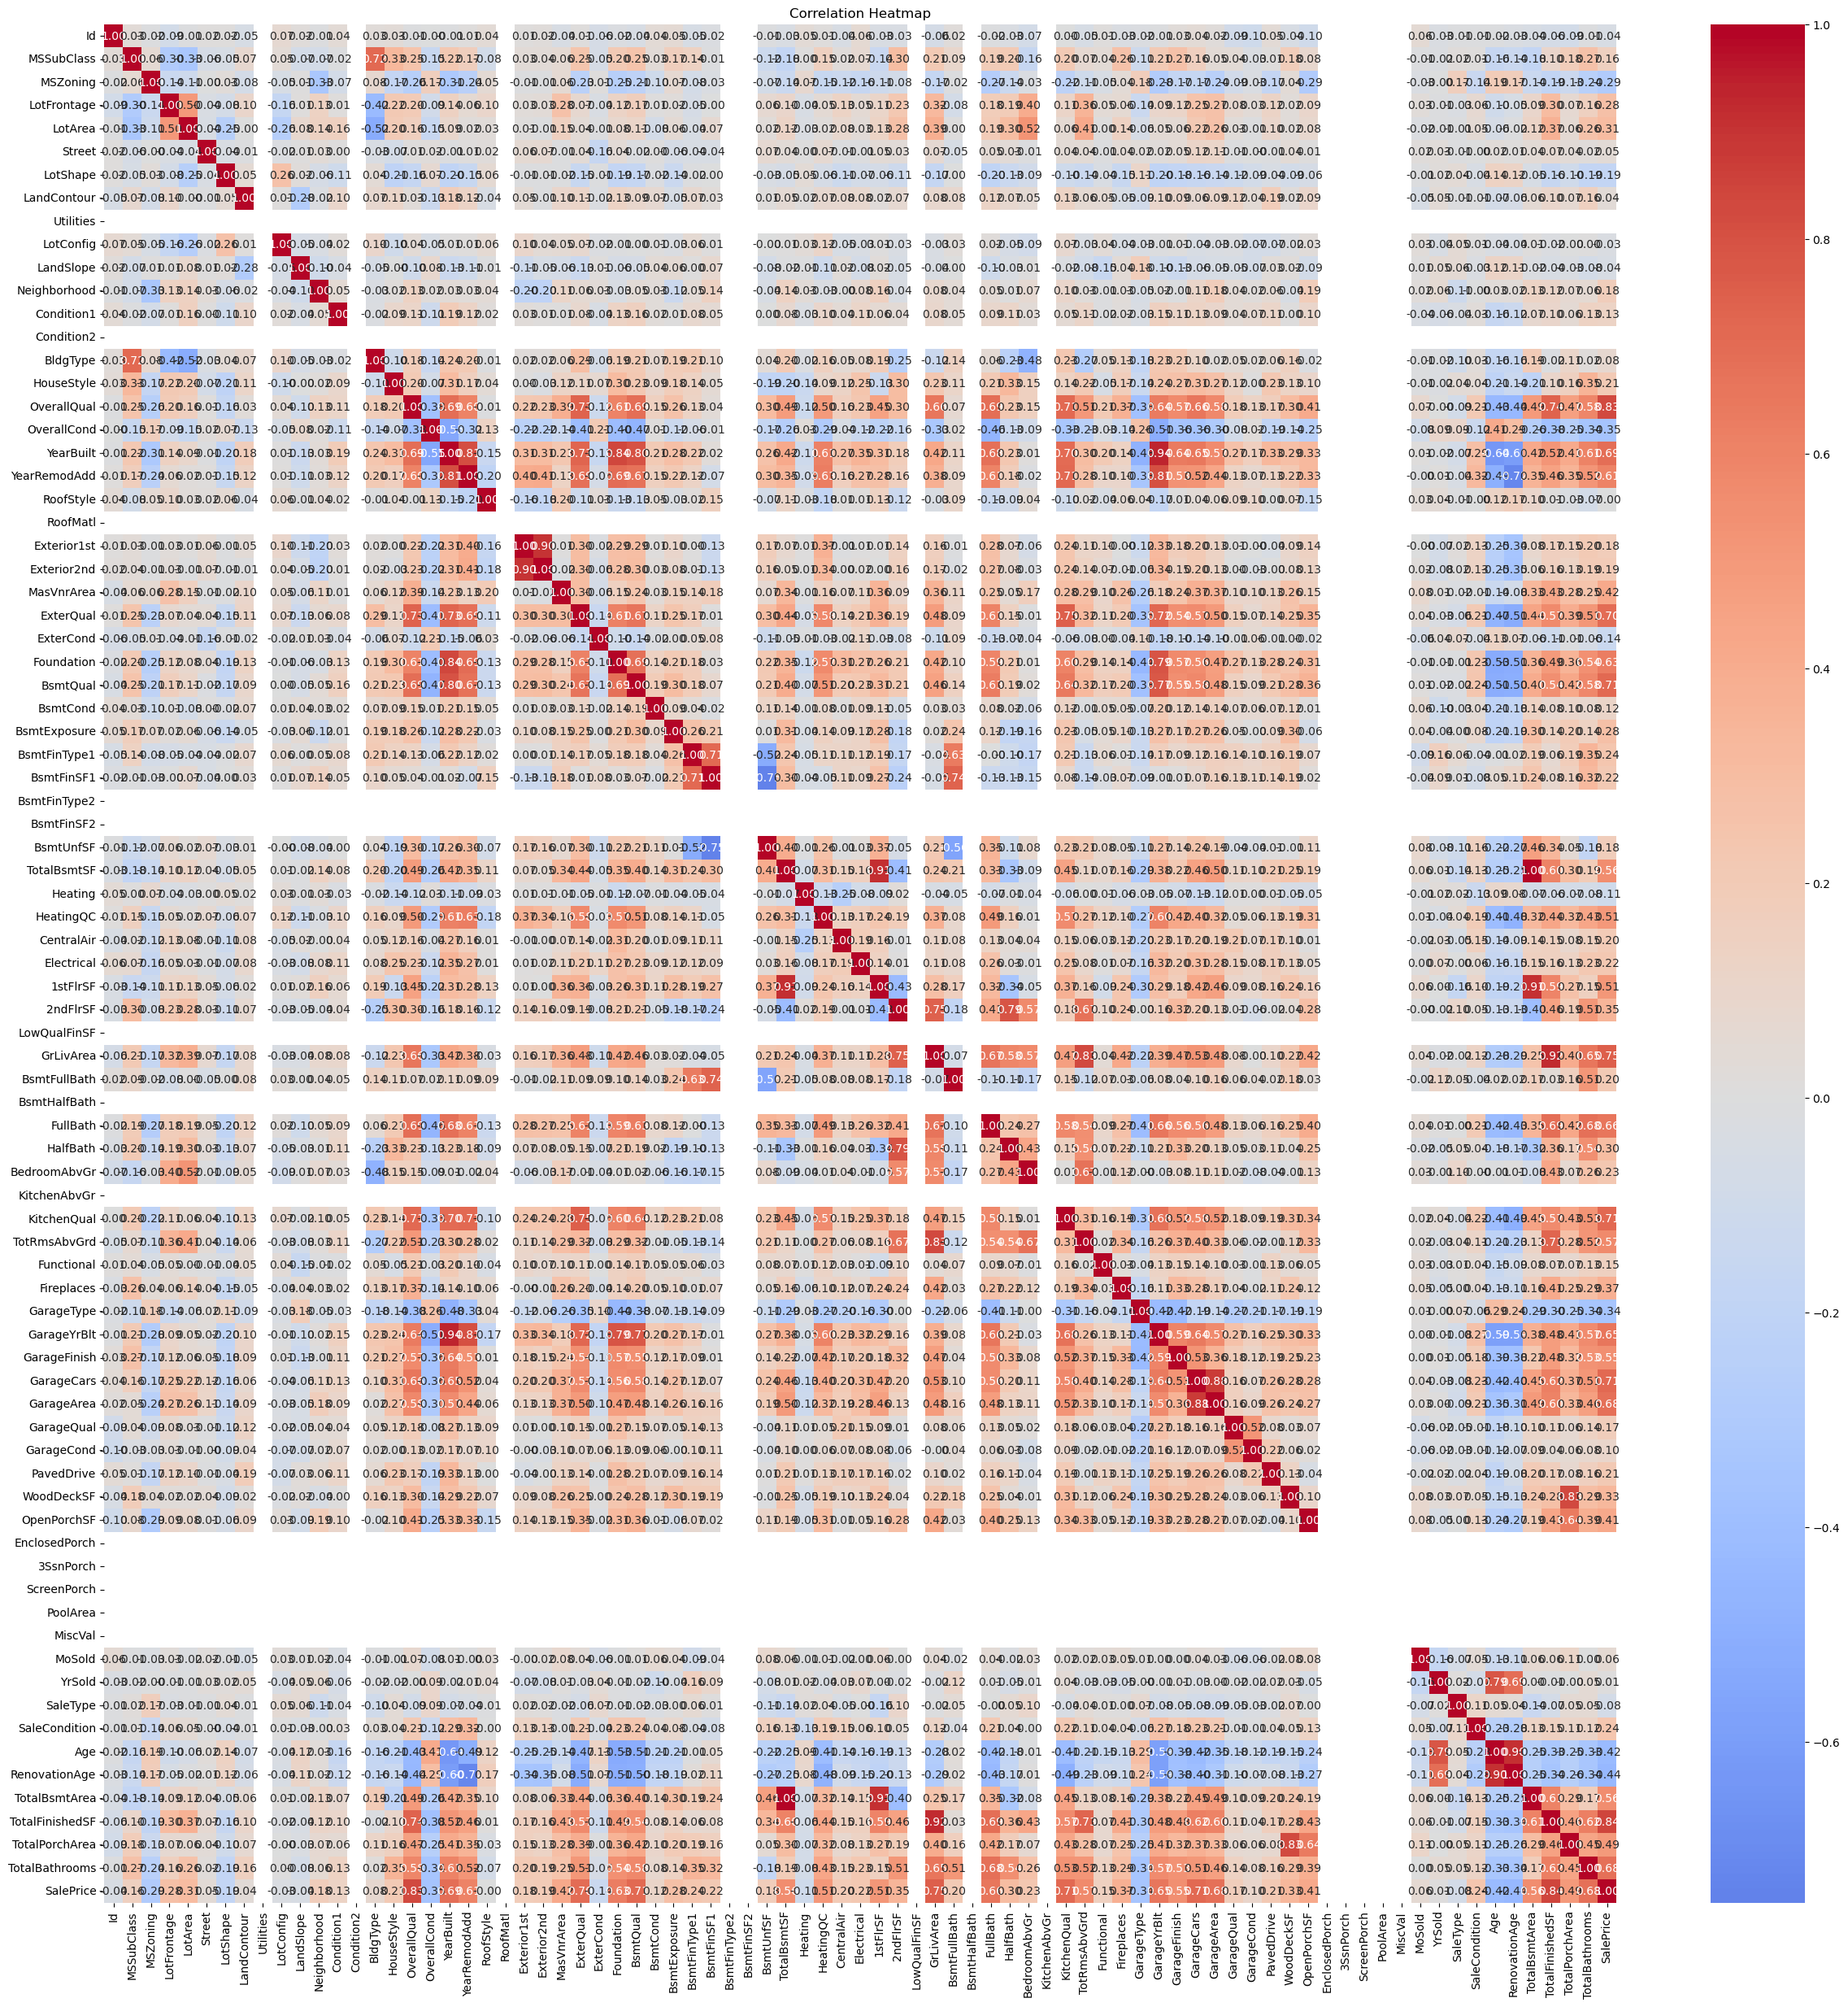

In [34]:
# Plot correlation heatmap
plt.figure(figsize=(30, 30))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', center=0)
plt.title('Correlation Heatmap')
plt.show()

In [35]:
correlation_matrix = X_train_encoded.corr()
correlation_with_target = correlation_matrix['SalePrice'].sort_values(ascending=False).head(25)

print("Correlation with SalePrice:")
print(correlation_with_target)

Correlation with SalePrice:
SalePrice          1.000000
TotalFinishedSF    0.844411
OverallQual        0.833461
GrLivArea          0.750305
GarageCars         0.712861
BsmtQual           0.710466
KitchenQual        0.706587
ExterQual          0.697288
YearBuilt          0.691358
TotalBathrooms     0.681807
GarageArea         0.679891
FullBath           0.660989
GarageYrBlt        0.653850
Foundation         0.629708
YearRemodAdd       0.609874
TotRmsAbvGrd       0.573962
TotalBsmtSF        0.559998
TotalBsmtArea      0.556732
GarageFinish       0.548476
1stFlrSF           0.509905
HeatingQC          0.505681
TotalPorchArea     0.489945
MasVnrArea         0.416912
OpenPorchSF        0.414152
Fireplaces         0.373203
Name: SalePrice, dtype: float64


In [47]:
top_features = [
    'OverallQual', 'GrLivArea', 'TotalFinishedSF', 'GarageCars', 'BsmtQual',
    'KitchenQual', 'ExterQual', 'TotalBathrooms', 'GarageArea', 'YearBuilt',
    'FullBath', 'Foundation', 'GarageYrBlt', 'YearRemodAdd', 'TotRmsAbvGrd',
    'TotalBsmtSF', 'GarageFinish', '1stFlrSF', 'HeatingQC', 'TotalPorchArea',
    'MasVnrArea', 'OpenPorchSF'
]

# 5- Training the model

In [36]:
X_train_encoded = X_train_encoded.drop(columns=['SalePrice'])

In [48]:
X_train_selected = X_train_encoded[top_features]
X_test_selected = X_test_encoded[top_features]

In [38]:
print(X_train_encoded.shape)
print(y_train.shape)
y_train = y_train.loc[X_train_encoded.index]

(554, 80)
(554,)


linear regression model

In [39]:
model = LinearRegression()
model.fit(X_train_encoded, y_train)

LinearRegression()

In [40]:
# Predict on the training set
y_train_pred = model.predict(X_train_encoded)
print("Training set performance:")
print(f"Mean Absolute Error: {mean_absolute_error(y_train, y_train_pred)}")
print(f"Mean Squared Error: {mean_squared_error(y_train, y_train_pred)}")
print(f"R2 Score: {r2_score(y_train, y_train_pred)}")

Training set performance:
Mean Absolute Error: 12861.056626544938
Mean Squared Error: 296670095.04252654
R2 Score: 0.9121717207638772


lasso regression model

In [41]:
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100]
}
lasso = Lasso(max_iter=10000)
grid_search_lasso = GridSearchCV(estimator=lasso, param_grid=param_grid,
                                 scoring='neg_mean_squared_error', cv=5)
grid_search_lasso.fit(X_train_encoded, y_train)

c:\Users\MAHMOUD\anaconda3\envs\py310_tf\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.276e+10, tolerance: 1.476e+08
  model = cd_fast.enet_coordinate_descent(
c:\Users\MAHMOUD\anaconda3\envs\py310_tf\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.653e+10, tolerance: 1.499e+08
  model = cd_fast.enet_coordinate_descent(
c:\Users\MAHMOUD\anaconda3\envs\py310_tf\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing 

GridSearchCV(cv=5, estimator=Lasso(max_iter=10000),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='neg_mean_squared_error')

In [42]:
best_lasso = grid_search_lasso.best_estimator_
print("Best Lasso Model Parameters:")
print(grid_search_lasso.best_params_)

Best Lasso Model Parameters:
{'alpha': 0.1}


In [43]:
y_train_pred_lasso = best_lasso.predict(X_train_encoded)
print(f"Mean Absolute Error: {mean_absolute_error(y_train, y_train_pred_lasso)}")
print(f"Mean Squared Error: {mean_squared_error(y_train, y_train_pred_lasso)}")
print(f"R2 Score: {r2_score(y_train, y_train_pred_lasso)}")

Mean Absolute Error: 12859.679871708622
Mean Squared Error: 296706901.2397576
R2 Score: 0.9121608244011429


ridge regression model 

In [44]:
ridge = Ridge(max_iter=10000)
grid_search_ridge = GridSearchCV(estimator=ridge, param_grid=param_grid,
                                 scoring='neg_mean_squared_error', cv=5)
grid_search_ridge.fit(X_train_encoded, y_train)

GridSearchCV(cv=5, estimator=Ridge(max_iter=10000),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='neg_mean_squared_error')

In [45]:
best_ridge = grid_search_ridge.best_estimator_
print("Best Ridge Model Parameters:")
print(grid_search_ridge.best_params_)

Best Ridge Model Parameters:
{'alpha': 0.001}


In [46]:
y_train_pred_ridge = best_ridge.predict(X_train_encoded)
print(f"Mean Absolute Error: {mean_absolute_error(y_train, y_train_pred_ridge)}")
print(f"Mean Squared Error: {mean_squared_error(y_train, y_train_pred_ridge)}")
print(f"R2 Score: {r2_score(y_train, y_train_pred_ridge)}")

Mean Absolute Error: 12880.132011134612
Mean Squared Error: 298725705.6259286
R2 Score: 0.9115631635033489
